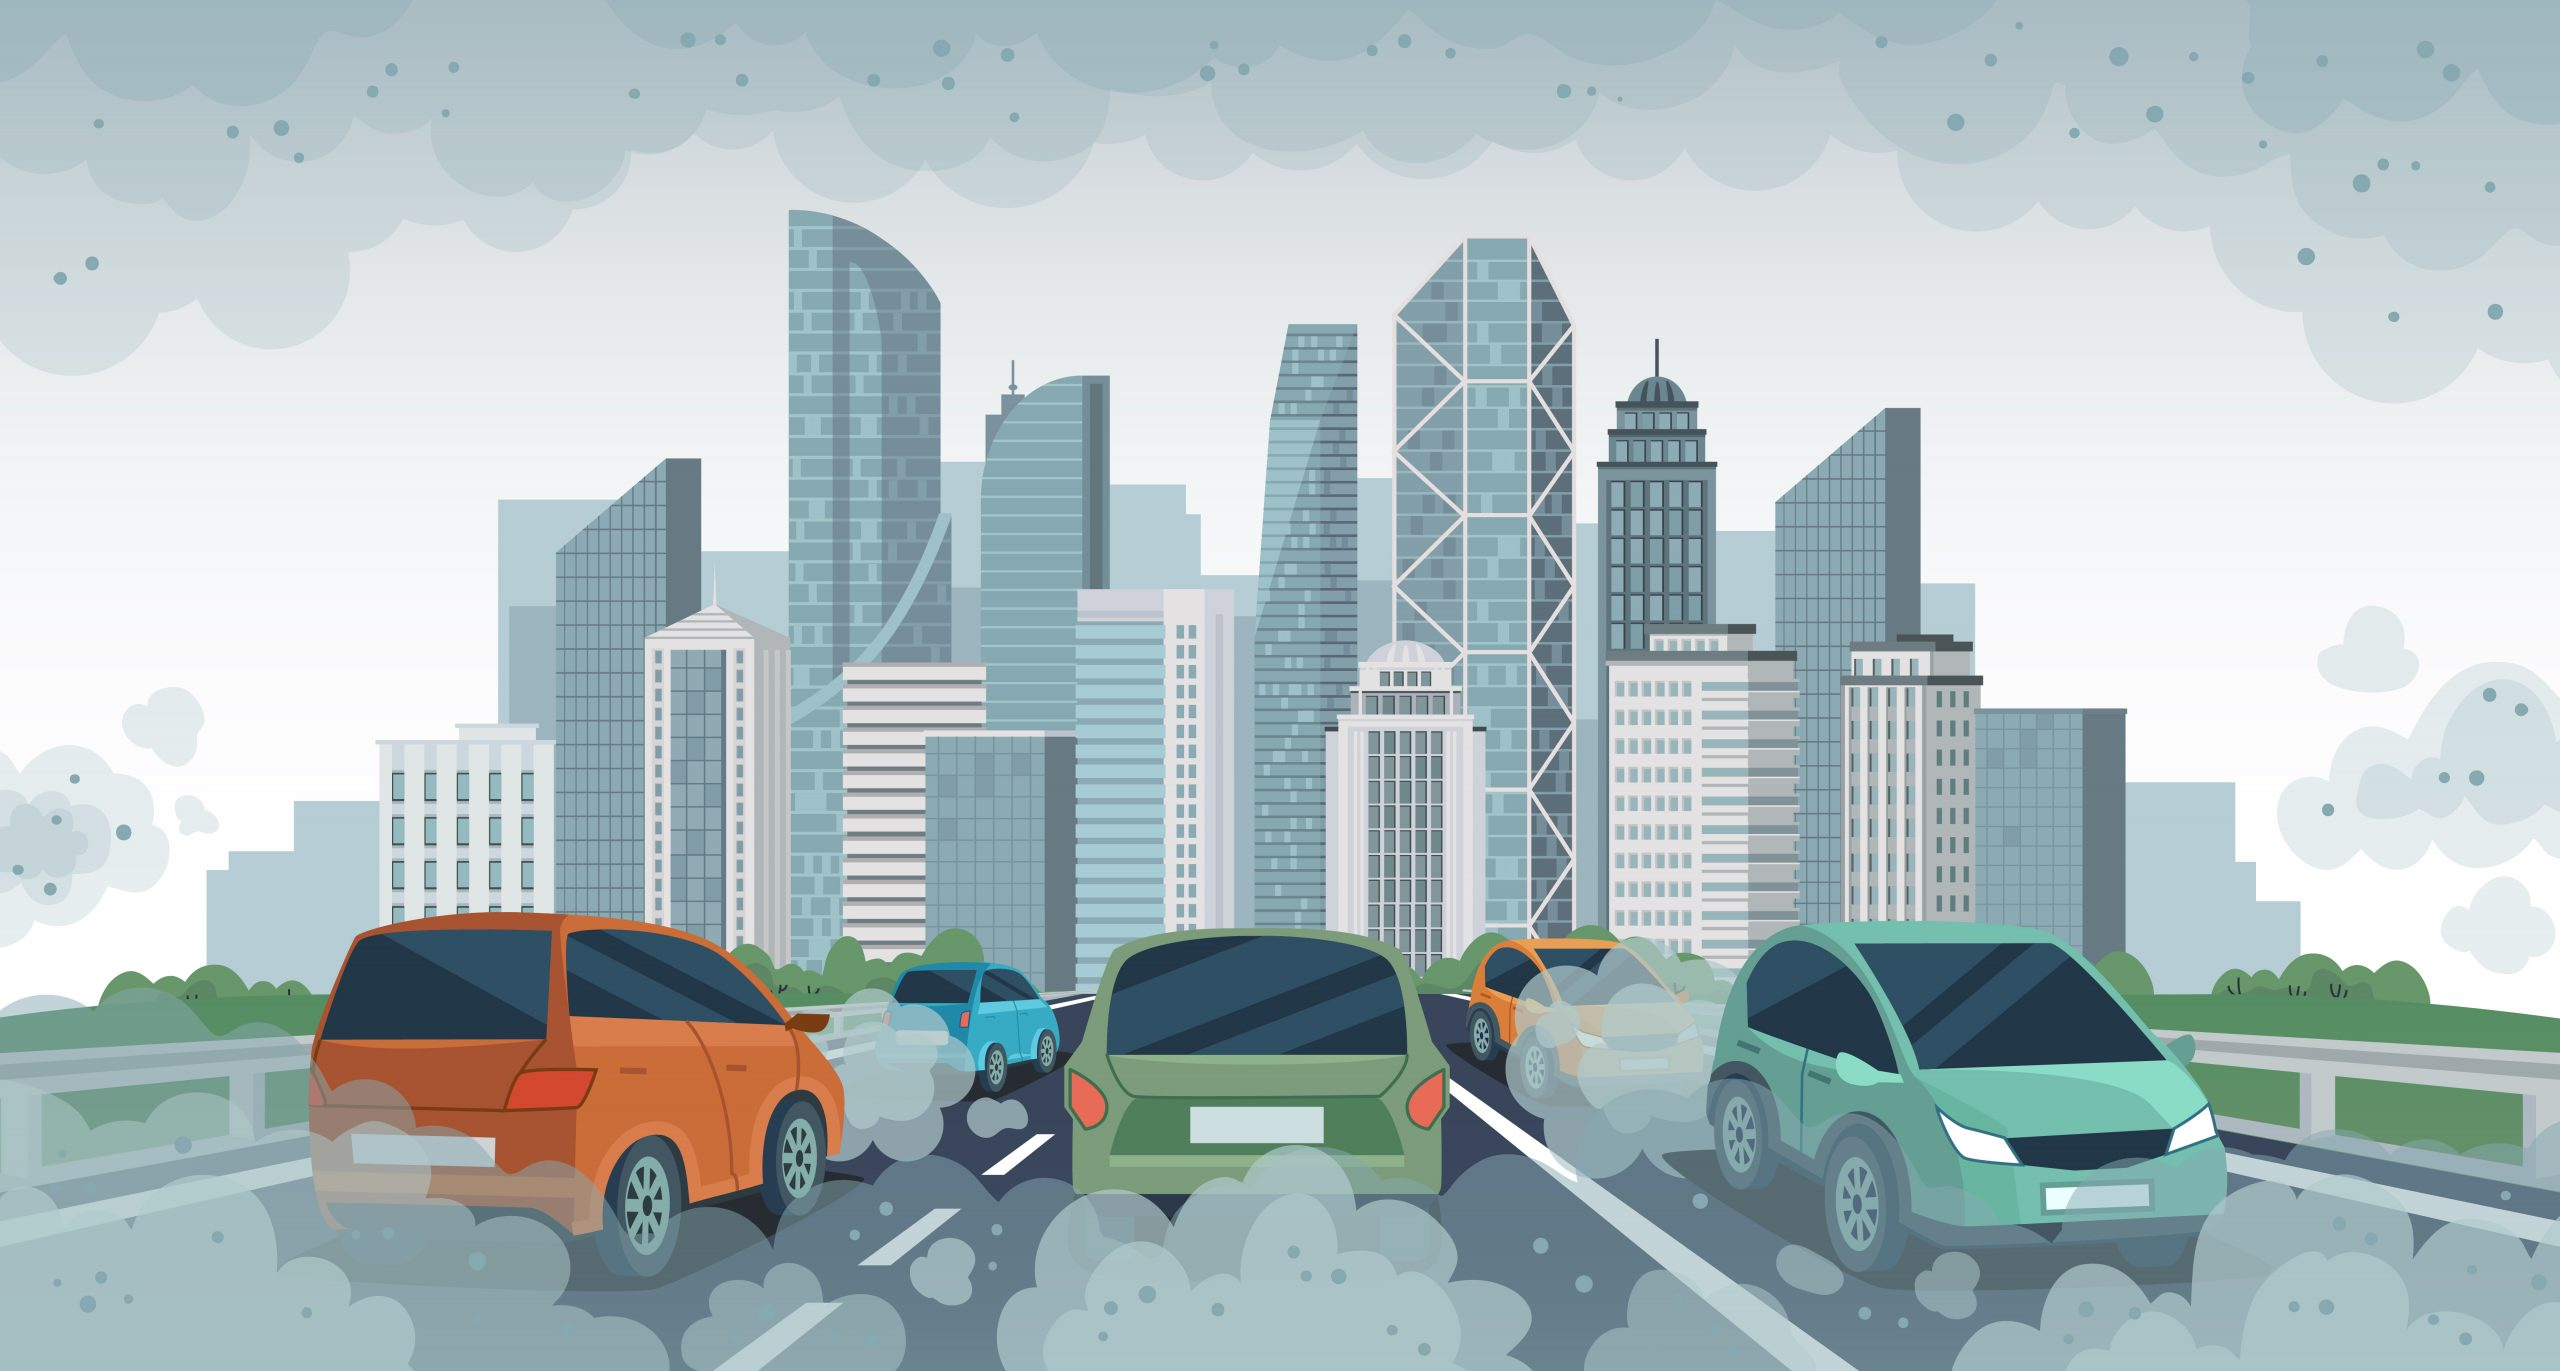

# <font color='green'> <b>About Data Set</b><font color='black'>

This dataset contains information about various car models and their CO2 Emission levels. The following code demonstrates usage of a Linear Regression models to predict CO2 Emission values. The data is divided into train and test sets to measure the metrics of performance of the model. Toward the end of the code, there are also some other Regression techniques.

Fuel Consumption City (L/100 km): This refers to the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving under city or urban conditions.

Fuel Consumption Hwy (L/100 km): This represents the amount of fuel, measured in liters, that a vehicle consumes per 100 kilometers of driving on highways or open roads.

Fuel Consumption Comb (L/100 km): This metric represents the combined fuel consumption of a vehicle, measured in liters, per 100 kilometers of driving. Unlike the individual "City" and "Hwy" measurements, the "Comb" value takes into account a mix of both city and highway driving conditions. It provides an average fuel efficiency figure that considers the vehicle's performance across various scenarios.

Fuel Consumption Comb (mpg): This metric is an alternative representation of the combined fuel consumption, measured in miles per gallon. Unlike the L/100 km unit, which measures fuel consumption (lower values are better), mpg (miles per gallon) measures fuel efficiency (higher values are better). A higher mpg value indicates that the vehicle can travel more miles using a fixed amount of fuel.

## <font color='blue'> <b>Insights obtained from this model</b><font color='black'>

In this model developed for prediction of CO2 emission based on vehicle characteristics, the main feature is engine size (measured in liters) which is a significant factor in determining a vehicle's power, performance, fuel efficiency, and emissions.

# <font color='green'> <b>EDA and Data Cleaning</b><font color='black'>

## <font color='blue'> <b>Import Library</b><font color='black'>

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.rcParams["figure.figsize"] = (10, 6)
import warnings
warnings.filterwarnings('ignore')

## <font color='blue'> <b>Read Dataset</b><font color='black'>

In [28]:

# Load the data
df = pd.read_csv('co2.csv')

In [29]:
# Dataset Overview
df.head()

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   
4  ACURA     RDX AWD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   
4         Z                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255  
4                           27                  244

In [30]:
df.shape  # number of observations and features

(7385, 12)

In [31]:
df.dtypes # data types

Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

In [32]:
df[df.duplicated()] # check duplicated rows

Make       Model            Vehicle Class  Engine Size(L)  \
1075         ACURA     RDX AWD              SUV - SMALL             3.5   
1076         ACURA         RLX                 MID-SIZE             3.5   
1081    ALFA ROMEO          4C               TWO-SEATER             1.8   
1082  ASTON MARTIN         DB9              MINICOMPACT             5.9   
1084  ASTON MARTIN  V8 VANTAGE               TWO-SEATER             4.7   
...            ...         ...                      ...             ...   
7356        TOYOTA      Tundra  PICKUP TRUCK - STANDARD             5.7   
7365    VOLKSWAGEN    Golf GTI                  COMPACT             2.0   
7366    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7367    VOLKSWAGEN       Jetta                  COMPACT             1.4   
7368    VOLKSWAGEN   Jetta GLI                  COMPACT             2.0   

      Cylinders Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
1075          6          AS6         Z                              12.1   
1076          6          AS6         Z                              11.9   
1081          4          AM6         Z                               9.7   
1082         12           A6         Z                              18.0   
1084          8          AM7         Z                              17.4   
...         ...          ...       ...                               ...   
7356          8          AS6         X                              17.7   
7365          4           M6         X                               9.8   
7366          4          AS8         X                               7.8   
7367          4           M6         X                               7.9   
7368          4          AM7         X                               9.3   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
1075                              8.7                              10.6   
1076                              7.7                              10.0   
1081                              6.9                               8.4   
1082                             12.6                              15.6   
1084                             11.3                              14.7   
...                               ...                               ...   
7356                             13.6                              15.9   
7365                              7.3                               8.7   
7366                              5.9                               7.0   
7367                              5.9                               7.0   
7368                              7.2                               8.4   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
1075                           27                  244  
1076                           28                  230  
1081                           34                  193  
1082                           18                  359  
1084                           19                  338  
...                           ...                  ...  
7356                           18                  371  
7365                           32                  203  
7366                           40                  162  
7367                           40                  163  
7368                           34                  196  

[1103 rows x 12 columns]

In [33]:
df.isna().sum() # missing values per feature

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

The dataset seems to be free of any null values.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

We see that there are no discrpancies in data types of each column; the string ones are assigned as object and the numeric ones are assigned as float or int.

The 'Make', 'Model', 'Vehicle Class', 'Transmission' and 'Fuel Type' columns contain object values, and the 'Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)' and 'CO2 Emissions(g/km)' columns contain numeric values.

In [35]:
df.describe(include='all').T

count unique            top  freq  \
Make                                7385     42           FORD   628   
Model                               7385   2053  F-150 FFV 4X4    32   
Vehicle Class                       7385     16    SUV - SMALL  1217   
Engine Size(L)                    7385.0    NaN            NaN   NaN   
Cylinders                         7385.0    NaN            NaN   NaN   
Transmission                        7385     27            AS6  1324   
Fuel Type                           7385      5              X  3637   
Fuel Consumption City (L/100 km)  7385.0    NaN            NaN   NaN   
Fuel Consumption Hwy (L/100 km)   7385.0    NaN            NaN   NaN   
Fuel Consumption Comb (L/100 km)  7385.0    NaN            NaN   NaN   
Fuel Consumption Comb (mpg)       7385.0    NaN            NaN   NaN   
CO2 Emissions(g/km)               7385.0    NaN            NaN   NaN   

                                        mean        std   min    25%    50%  \
Make                                     NaN        NaN   NaN    NaN    NaN   
Model                                    NaN        NaN   NaN    NaN    NaN   
Vehicle Class                            NaN        NaN   NaN    NaN    NaN   
Engine Size(L)                      3.160068    1.35417   0.9    2.0    3.0   
Cylinders                            5.61503   1.828307   3.0    4.0    6.0   
Transmission                             NaN        NaN   NaN    NaN    NaN   
Fuel Type                                NaN        NaN   NaN    NaN    NaN   
Fuel Consumption City (L/100 km)   12.556534   3.500274   4.2   10.1   12.1   
Fuel Consumption Hwy (L/100 km)     9.041706   2.224456   4.0    7.5    8.7   
Fuel Consumption Comb (L/100 km)   10.975071   2.892506   4.1    8.9   10.6   
Fuel Consumption Comb (mpg)        27.481652   7.231879  11.0   22.0   27.0   
CO2 Emissions(g/km)               250.584699  58.512679  96.0  208.0  246.0   

                                    75%    max  
Make                                NaN    NaN  
Model                               NaN    NaN  
Vehicle Class                       NaN    NaN  
Engine Size(L)                      3.7    8.4  
Cylinders                           6.0   16.0  
Transmission                        NaN    NaN  
Fuel Type                           NaN    NaN  
Fuel Consumption City (L/100 km)   14.6   30.6  
Fuel Consumption Hwy (L/100 km)    10.2   20.6  
Fuel Consumption Comb (L/100 km)   12.6   26.1  
Fuel Consumption Comb (mpg)        32.0   69.0  
CO2 Emissions(g/km)               288.0  522.0

In [37]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## <font color='blue'> <b>Make</b><font color='black'>

In [39]:
df.Make.unique()

array(['ACURA', 'ALFA ROMEO', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW',
       'BUICK', 'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT',
       'FORD', 'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP',
       'KIA', 'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO', 'GENESIS', 'BUGATTI'],
      dtype=object)

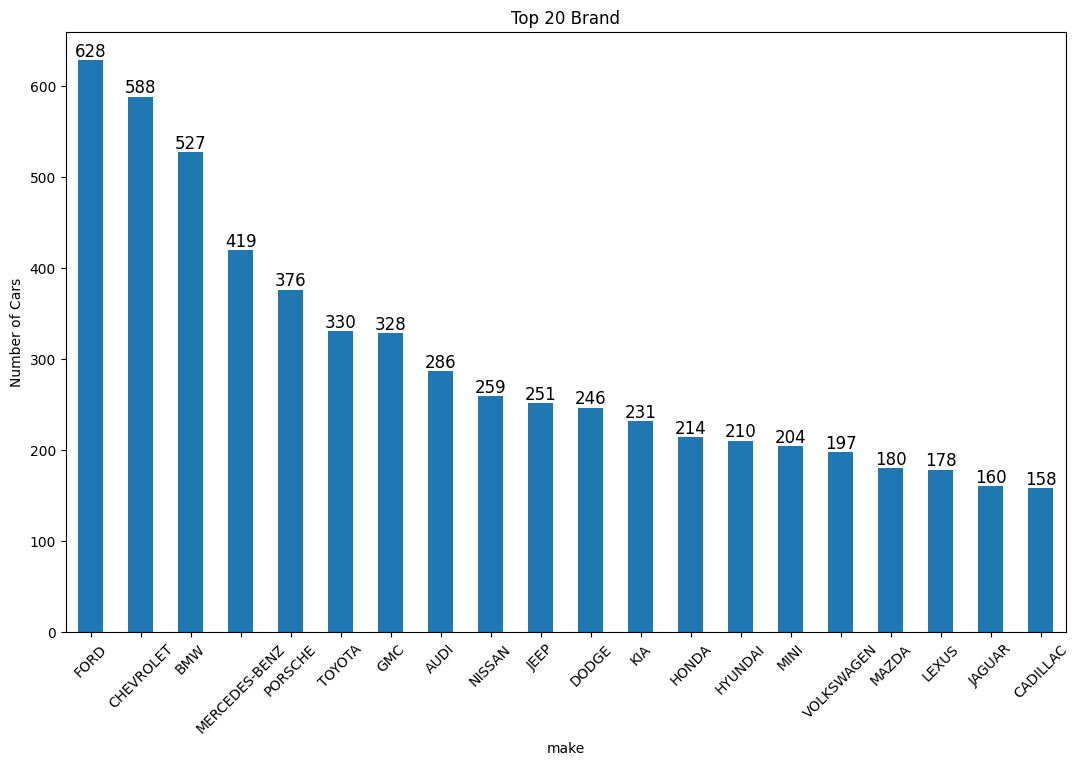

In [40]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Make.value_counts().sort_values(ascending=False).head(20) # [0:20]
counts.plot(kind = "bar")
plt.title('Top 20 Brand')   
plt.xlabel('make') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

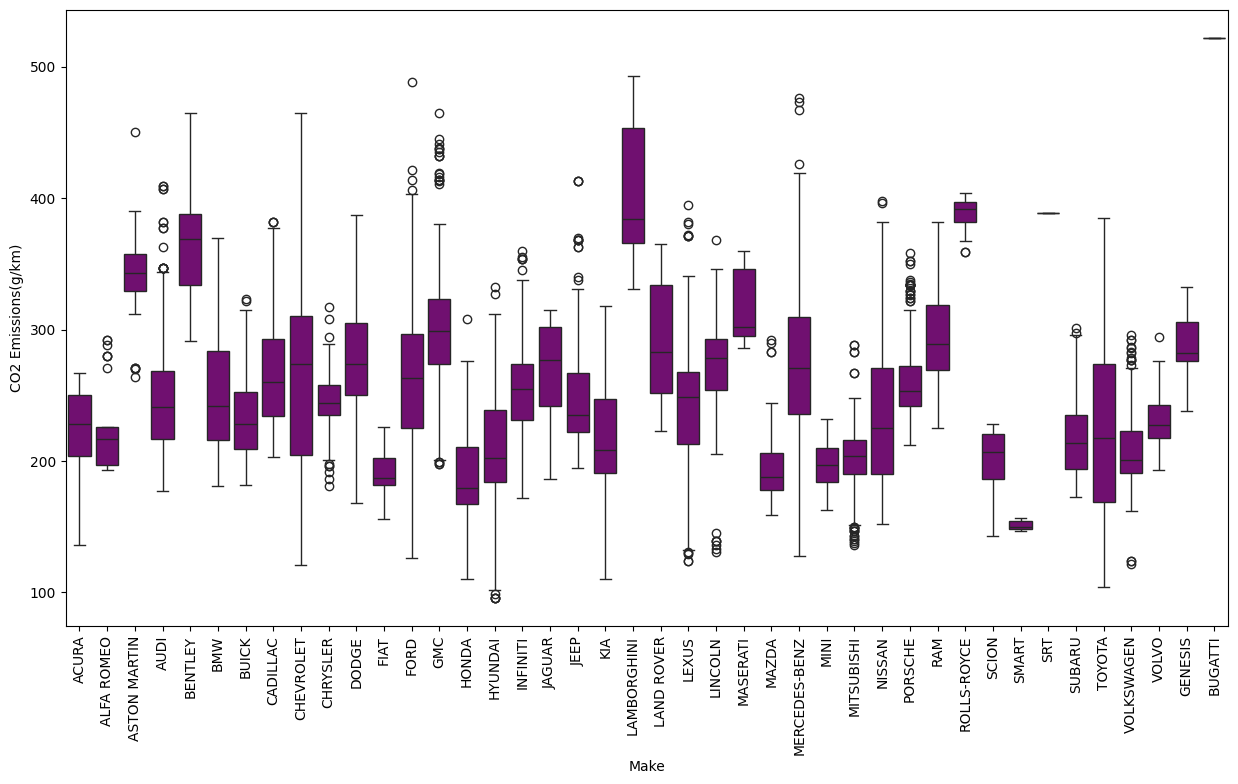

In [41]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, color='purple')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Model</b><font color='black'>

In [44]:
df.Model.unique()

array(['ILX', 'ILX HYBRID', 'MDX 4WD', ...,
       'Tacoma 4WD D-Cab TRD Off-Road/Pro', 'Atlas Cross Sport 4MOTION',
       'XC40 T4 AWD'], dtype=object)

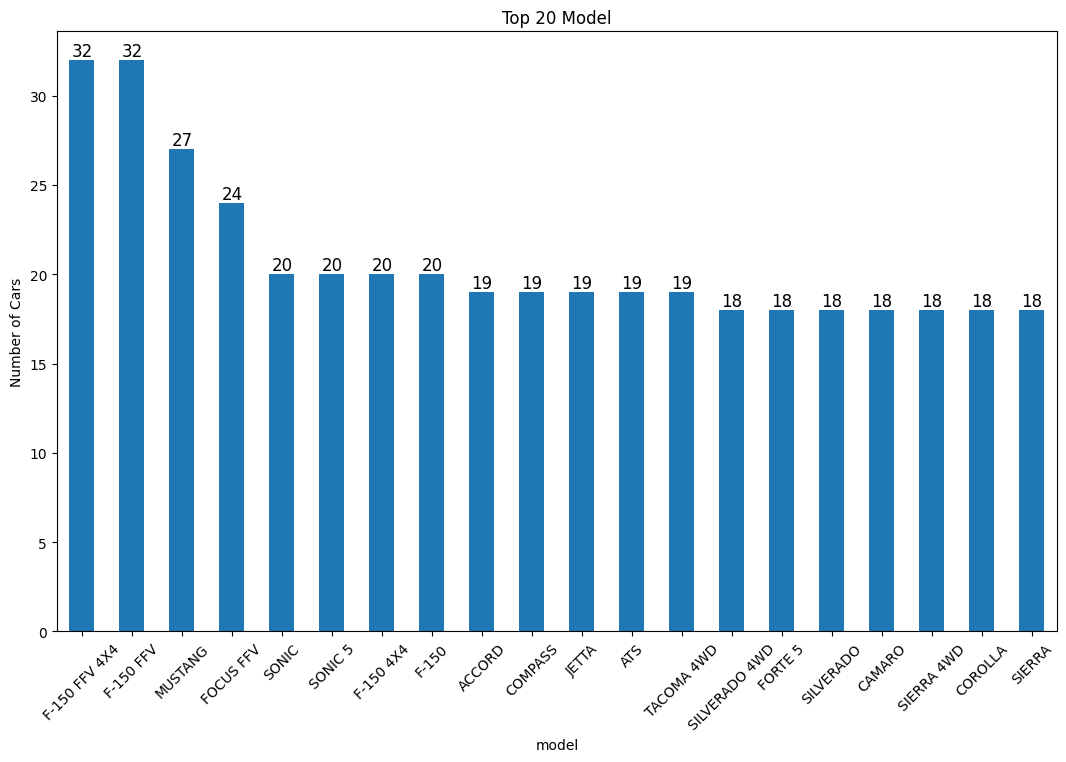

In [45]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df.Model.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Top 20 Model')   
plt.xlabel('model') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

## <font color='blue'> <b>Vehicle Class</b><font color='black'>

In [46]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

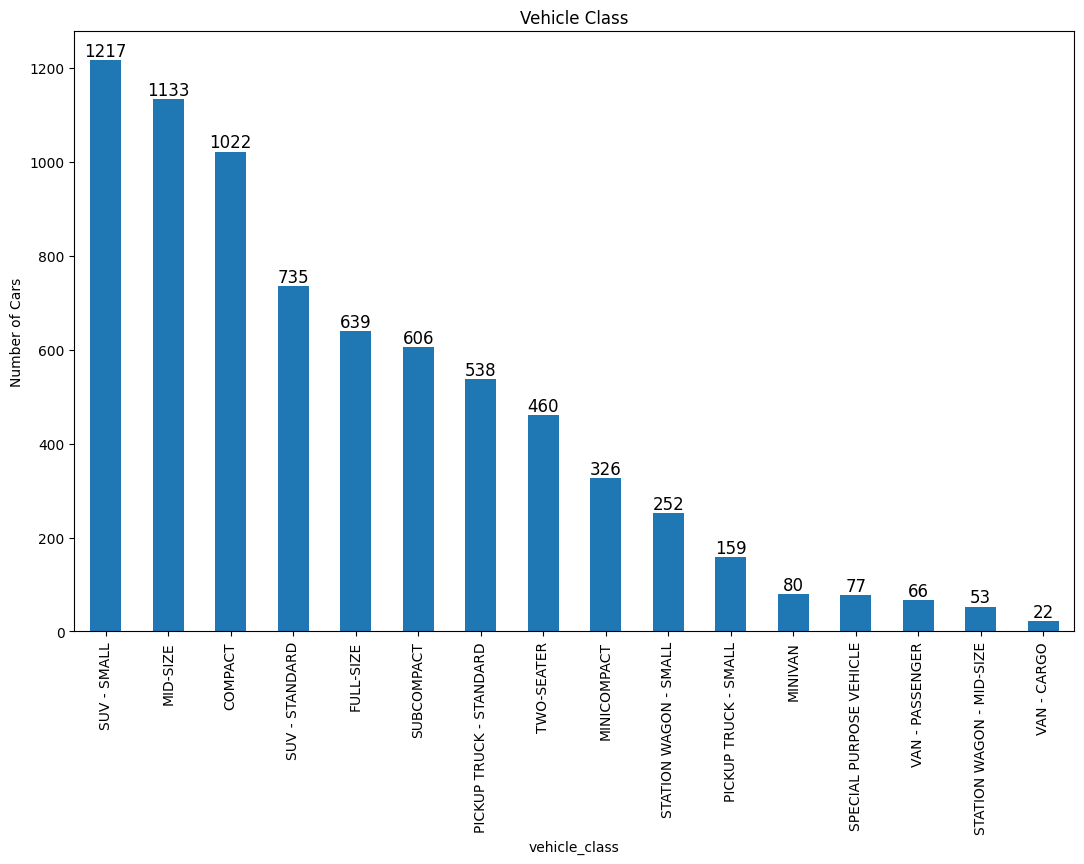

In [47]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df['Vehicle Class'].value_counts().sort_values(ascending=False)
counts.plot(kind = "bar")
plt.title('Vehicle Class')   
plt.xlabel('vehicle_class') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [49]:
transmission_distr = df['Vehicle Class'].value_counts().reset_index(name='count')
transmission_distr.columns = ['Vehicle Class', 'count']  # Make sure this matches your DataFrame columns

fig = px.pie(transmission_distr, values='count', names='Vehicle Class', title="Vehicle Class Distribution")
fig.show()

## <font color='blue'> <b>Engine Size</b><font color='black'>

In [50]:
df['Engine Size(L)'].unique()

array([2. , 2.4, 1.5, 3.5, 3.7, 1.8, 5.9, 4.7, 3. , 4. , 6.3, 4.2, 5.2,
       6. , 6.8, 4.4, 3.6, 1.4, 2.5, 6.2, 4.3, 5.3, 4.8, 1.2, 5.7, 6.4,
       4.6, 5.4, 1.6, 5. , 1. , 5.8, 3.8, 3.3, 5.6, 3.2, 6.5, 5.5, 2.1,
       3.4, 2.7, 6.6, 6.7, 1.3, 8.4, 2.3, 2.8, 0.9, 2.9, 8. , 2.2])

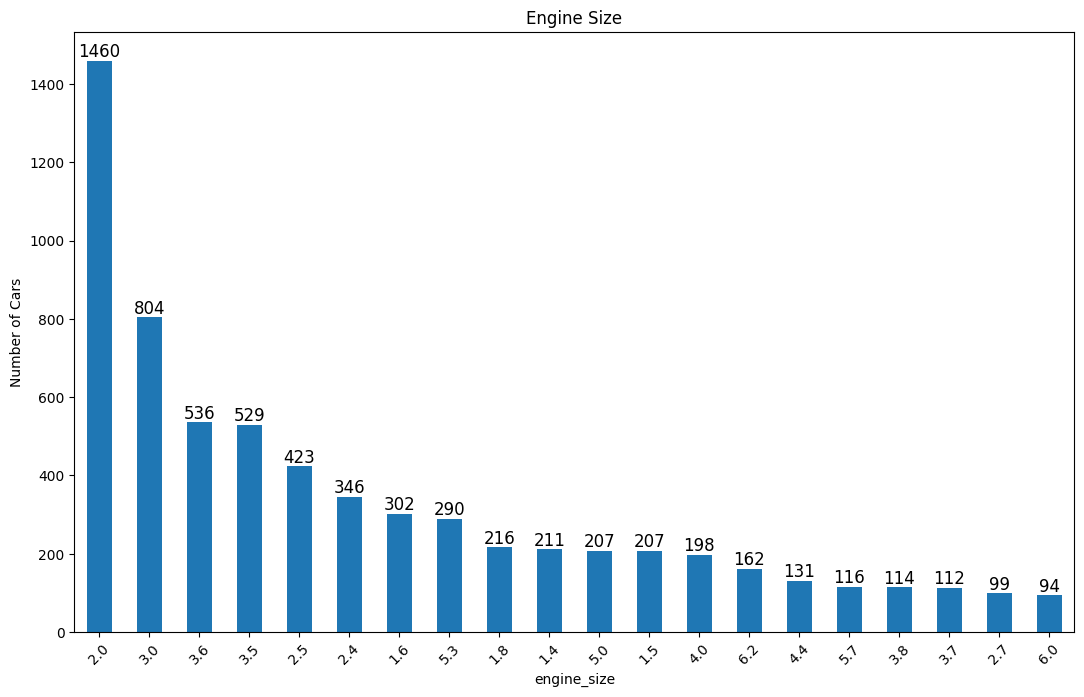

In [51]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_axes([0,0,1,1])
counts = df['Engine Size(L)'].value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Engine Size')   
plt.xlabel('engine_size') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

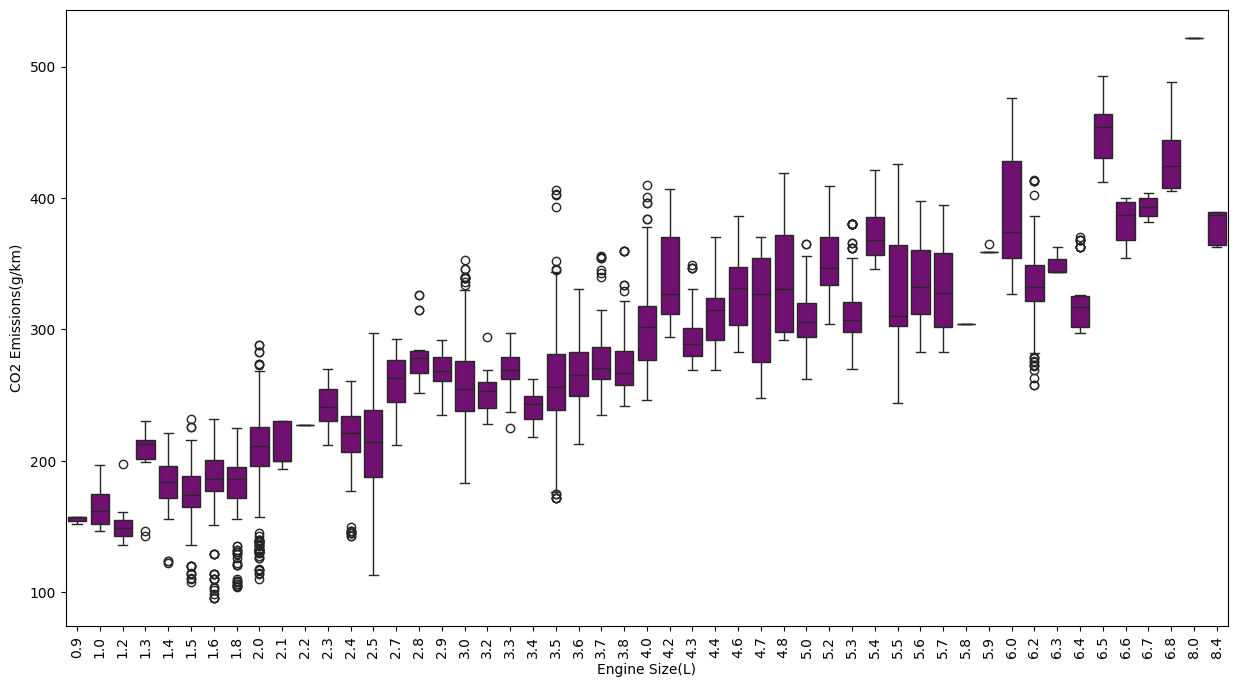

In [52]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df, color='purple')
plt.xticks(rotation = 90);

## <font color='blue'> <b>Cylinders</b><font color='black'>

In [53]:
df.Cylinders.value_counts().sort_values(ascending=False)

Cylinders
4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: count, dtype: int64

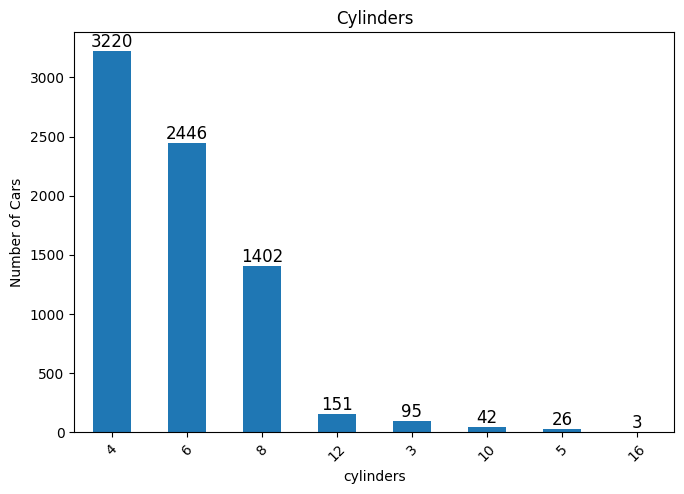

In [54]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Cylinders.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Cylinders')   
plt.xlabel('cylinders') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [56]:
transmission_distr = df['Cylinders'].value_counts().reset_index(name='count')
transmission_distr.columns = ['Cylinders', 'count']  

fig = px.pie(transmission_distr, values='count', names='Cylinders', title="Cylinders Distribution")
fig.show()

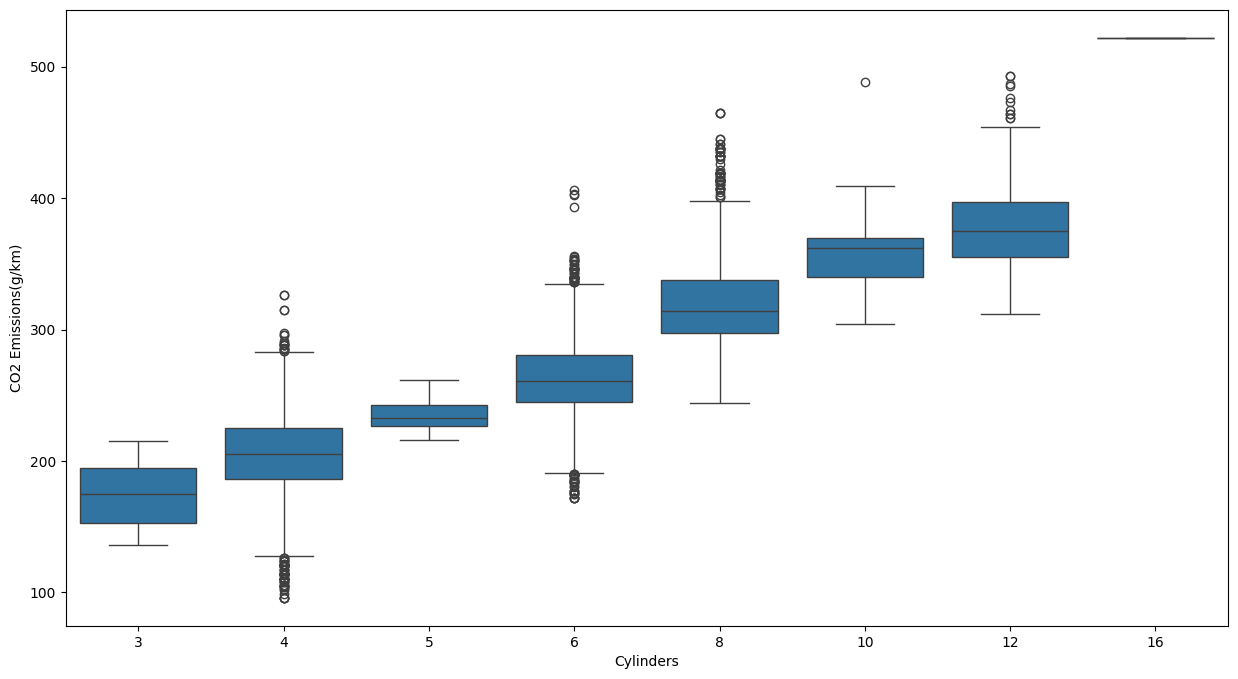

In [57]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Cylinders", y='CO2 Emissions(g/km)', data=df);

## <font color='blue'> <b>Transmission</b><font color='black'>

In [58]:
df.Transmission.value_counts().sort_values(ascending=False)

Transmission
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

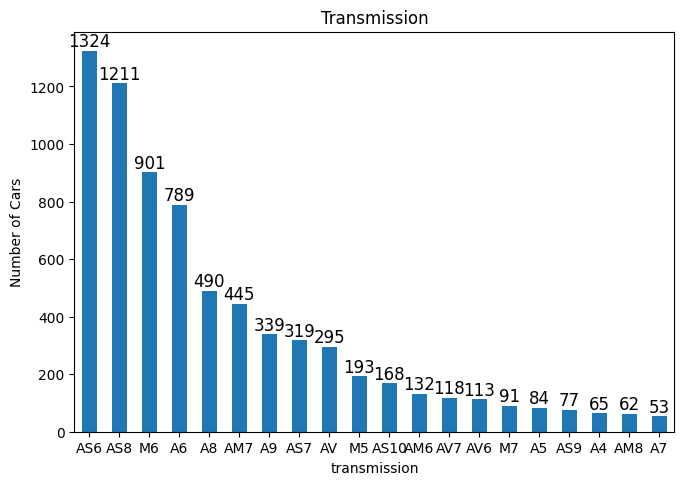

In [59]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df.Transmission.value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Transmission')   
plt.xlabel('transmission') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

In [60]:
transmission_distr = df['Transmission'].value_counts().reset_index()
transmission_distr.columns = ['Transmission', 'count']  
fig = px.pie(transmission_distr, values='count', names='Transmission')
fig.update_layout(title="Transmission Distribution")
fig.show()

## <font color='blue'> <b>Fuel Type and Consumption</b><font color='black'>

In [61]:
df['Fuel Type'].value_counts()
# X = Regular gasoline-benzin
# Z = Premium gasoline-benzin
# D = Diesel
# E = Ethanol (E85)
# N = Natural gas

Fuel Type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

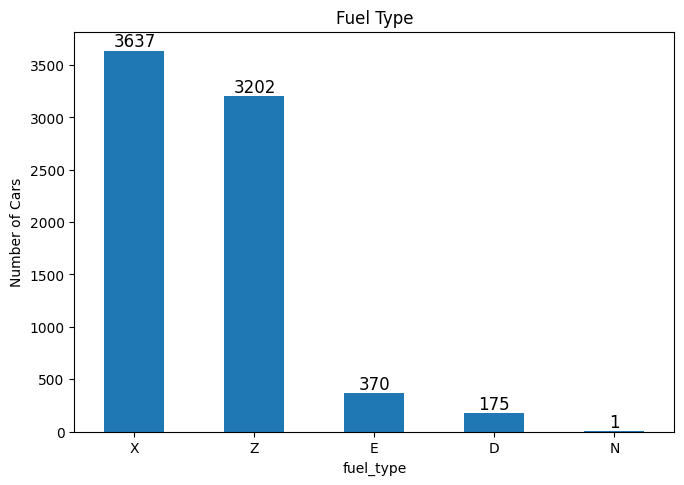

In [63]:
fig = plt.figure(figsize = (6,4))
ax = fig.add_axes([0,0,1,1])
counts = df['Fuel Type'].value_counts().sort_values(ascending=False).head(20)
counts.plot(kind = "bar")
plt.title('Fuel Type')   
plt.xlabel('fuel_type') 
plt.ylabel('Number of Cars')
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], labels=counts.values, fontsize=12);

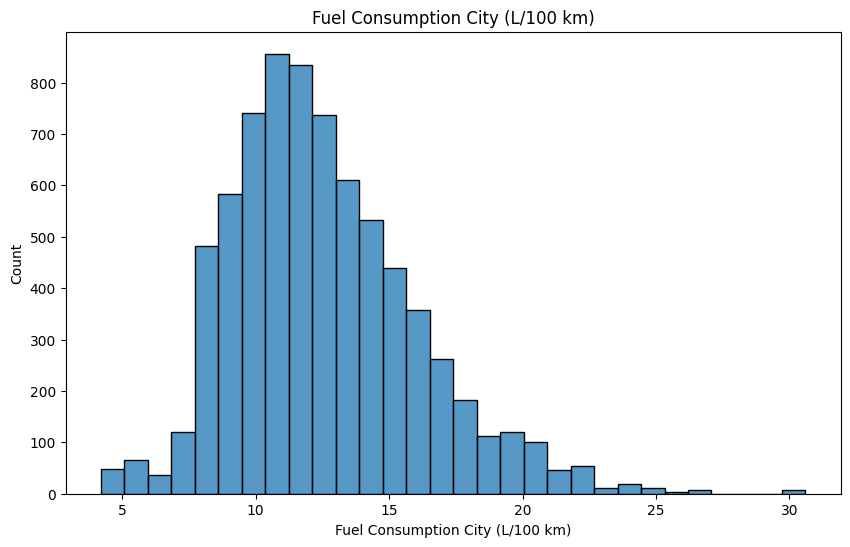

In [64]:
sns.histplot(data=df, x='Fuel Consumption City (L/100 km)', bins=30)
plt.title('Fuel Consumption City (L/100 km)');

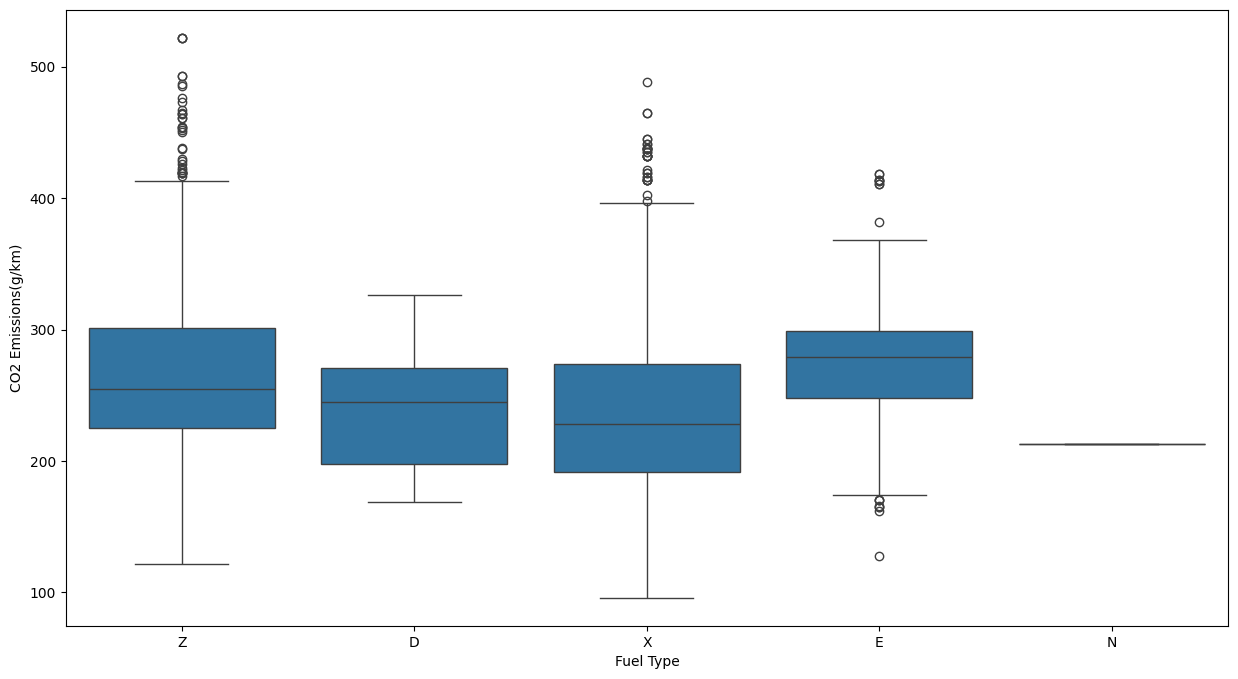

In [65]:
plt.figure(figsize = (15,8))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df);

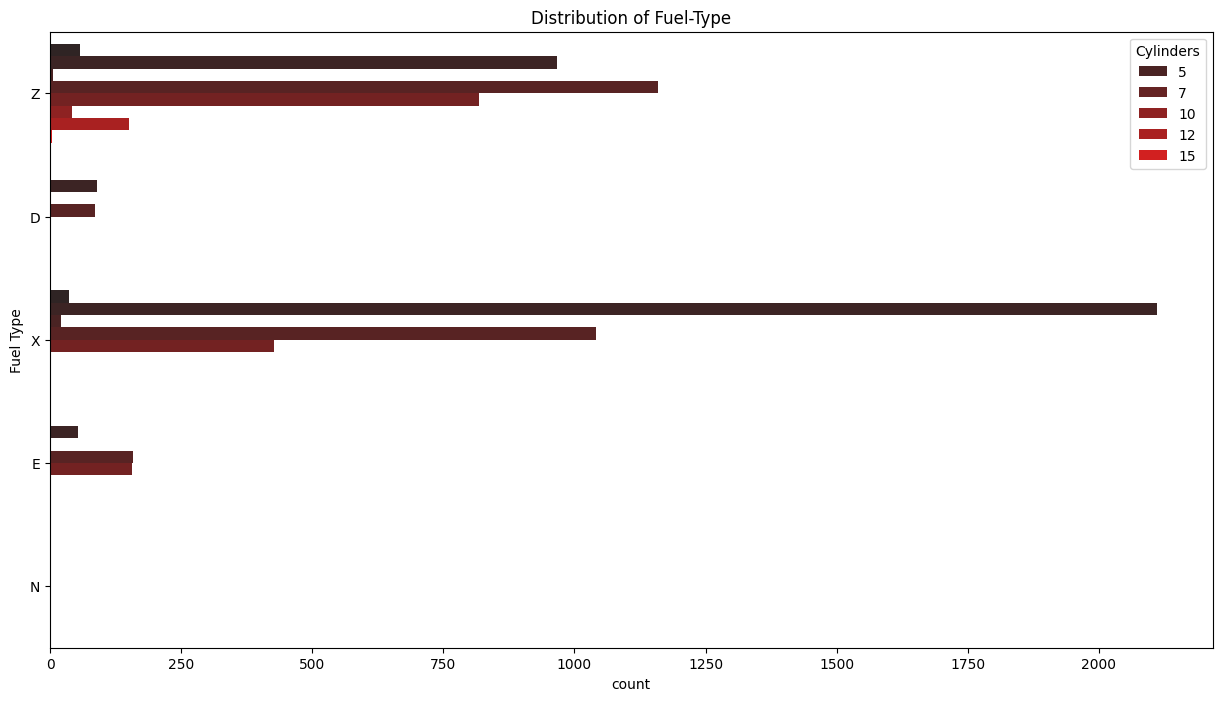

In [66]:
plt.figure(figsize = (15,8))
sns.countplot(y="Fuel Type", data=df, hue='Cylinders', color='red')
plt.title('Distribution of Fuel-Type');

## <font color='blue'> <b>CO2 Emissions</b><font color='black'>

In [67]:
df[df['CO2 Emissions(g/km)'] == df['CO2 Emissions(g/km)'].min()]

Make       Model Vehicle Class  Engine Size(L)  Cylinders  \
3824  HYUNDAI  IONIQ BLUE     FULL-SIZE             1.6          4   
4900  HYUNDAI  IONIQ BLUE     FULL-SIZE             1.6          4   
5931  HYUNDAI  IONIQ Blue     FULL-SIZE             1.6          4   
6950  HYUNDAI  IONIQ Blue     FULL-SIZE             1.6          4   

     Transmission Fuel Type  Fuel Consumption City (L/100 km)  \
3824          AM6         X                               4.2   
4900          AM6         X                               4.2   
5931          AM6         X                               4.2   
6950          AM6         X                               4.2   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
3824                              4.0                               4.1   
4900                              4.0                               4.1   
5931                              4.0                               4.1   
6950                              4.0                               4.1   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
3824                           69                   96  
4900                           69                   96  
5931                           69                   96  
6950                           69                   96

In [68]:
df[df['CO2 Emissions(g/km)'] == df['CO2 Emissions(g/km)'].max()]

Make   Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
4509  BUGATTI  CHIRON    TWO-SEATER             8.0         16          AM7   
5575  BUGATTI  Chiron    TWO-SEATER             8.0         16          AM7   
6640  BUGATTI  Chiron    TWO-SEATER             8.0         16          AM7   

     Fuel Type  Fuel Consumption City (L/100 km)  \
4509         Z                              26.8   
5575         Z                              26.8   
6640         Z                              26.8   

      Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
4509                             16.6                              22.2   
5575                             16.6                              22.2   
6640                             16.6                              22.2   

      Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
4509                           13                  522  
5575                           13                  522  
6640                           13                  522

In [69]:
def color_correlation1(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.6 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.6 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color

# Sadece sayısal verileri içeren bir DataFrame oluştur
numeric_df = df.select_dtypes(include=[np.number])

# Sayısal DataFrame üzerinde korelasyon hesapla ve stillendir
numeric_df.corr().style.applymap(color_correlation1)

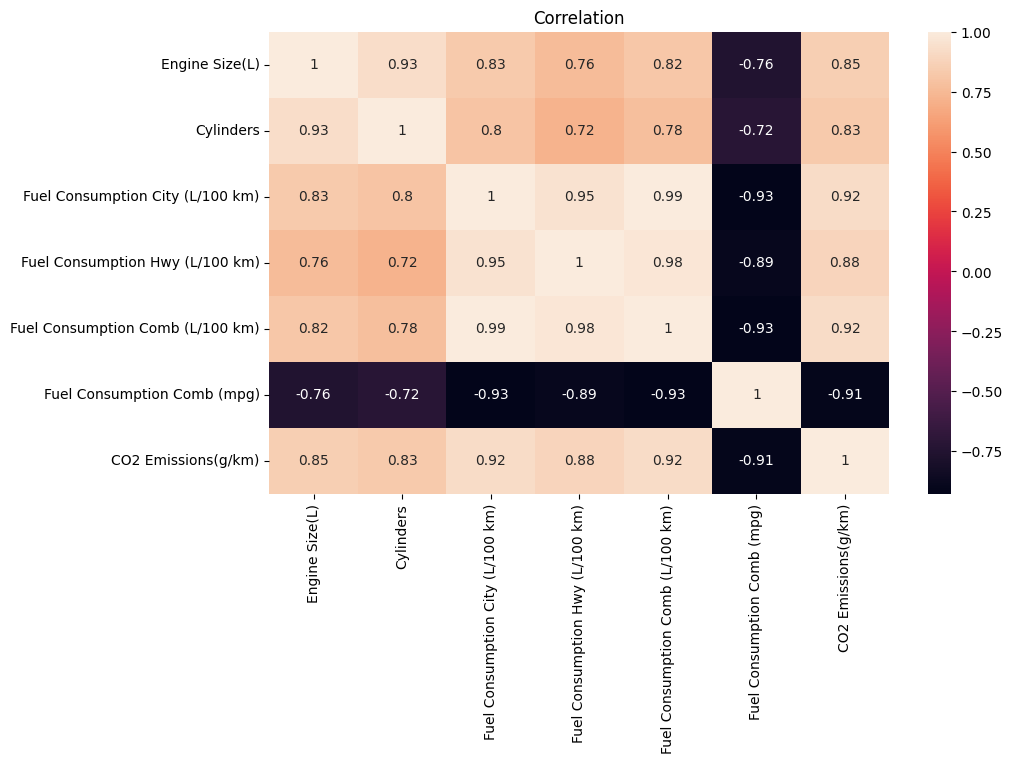

In [70]:
sns.heatmap(numeric_df.corr(),annot=True)
plt.title("Correlation");

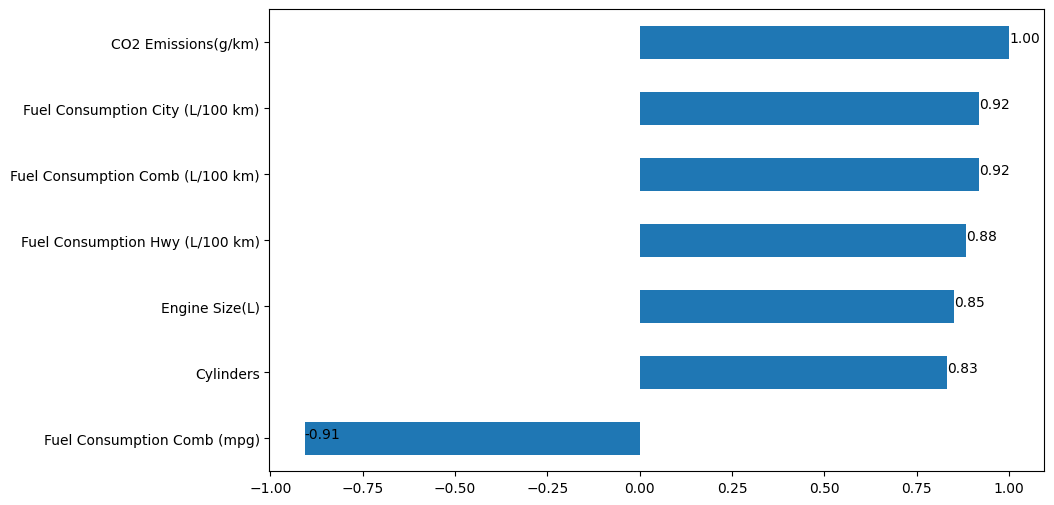

In [71]:
corr_values = numeric_df.corr()['CO2 Emissions(g/km)'].sort_values()
ax = corr_values.plot.barh()
for index, value in enumerate(corr_values):
    plt.text(value, index, "{:.2f}".format(value))

plt.show()

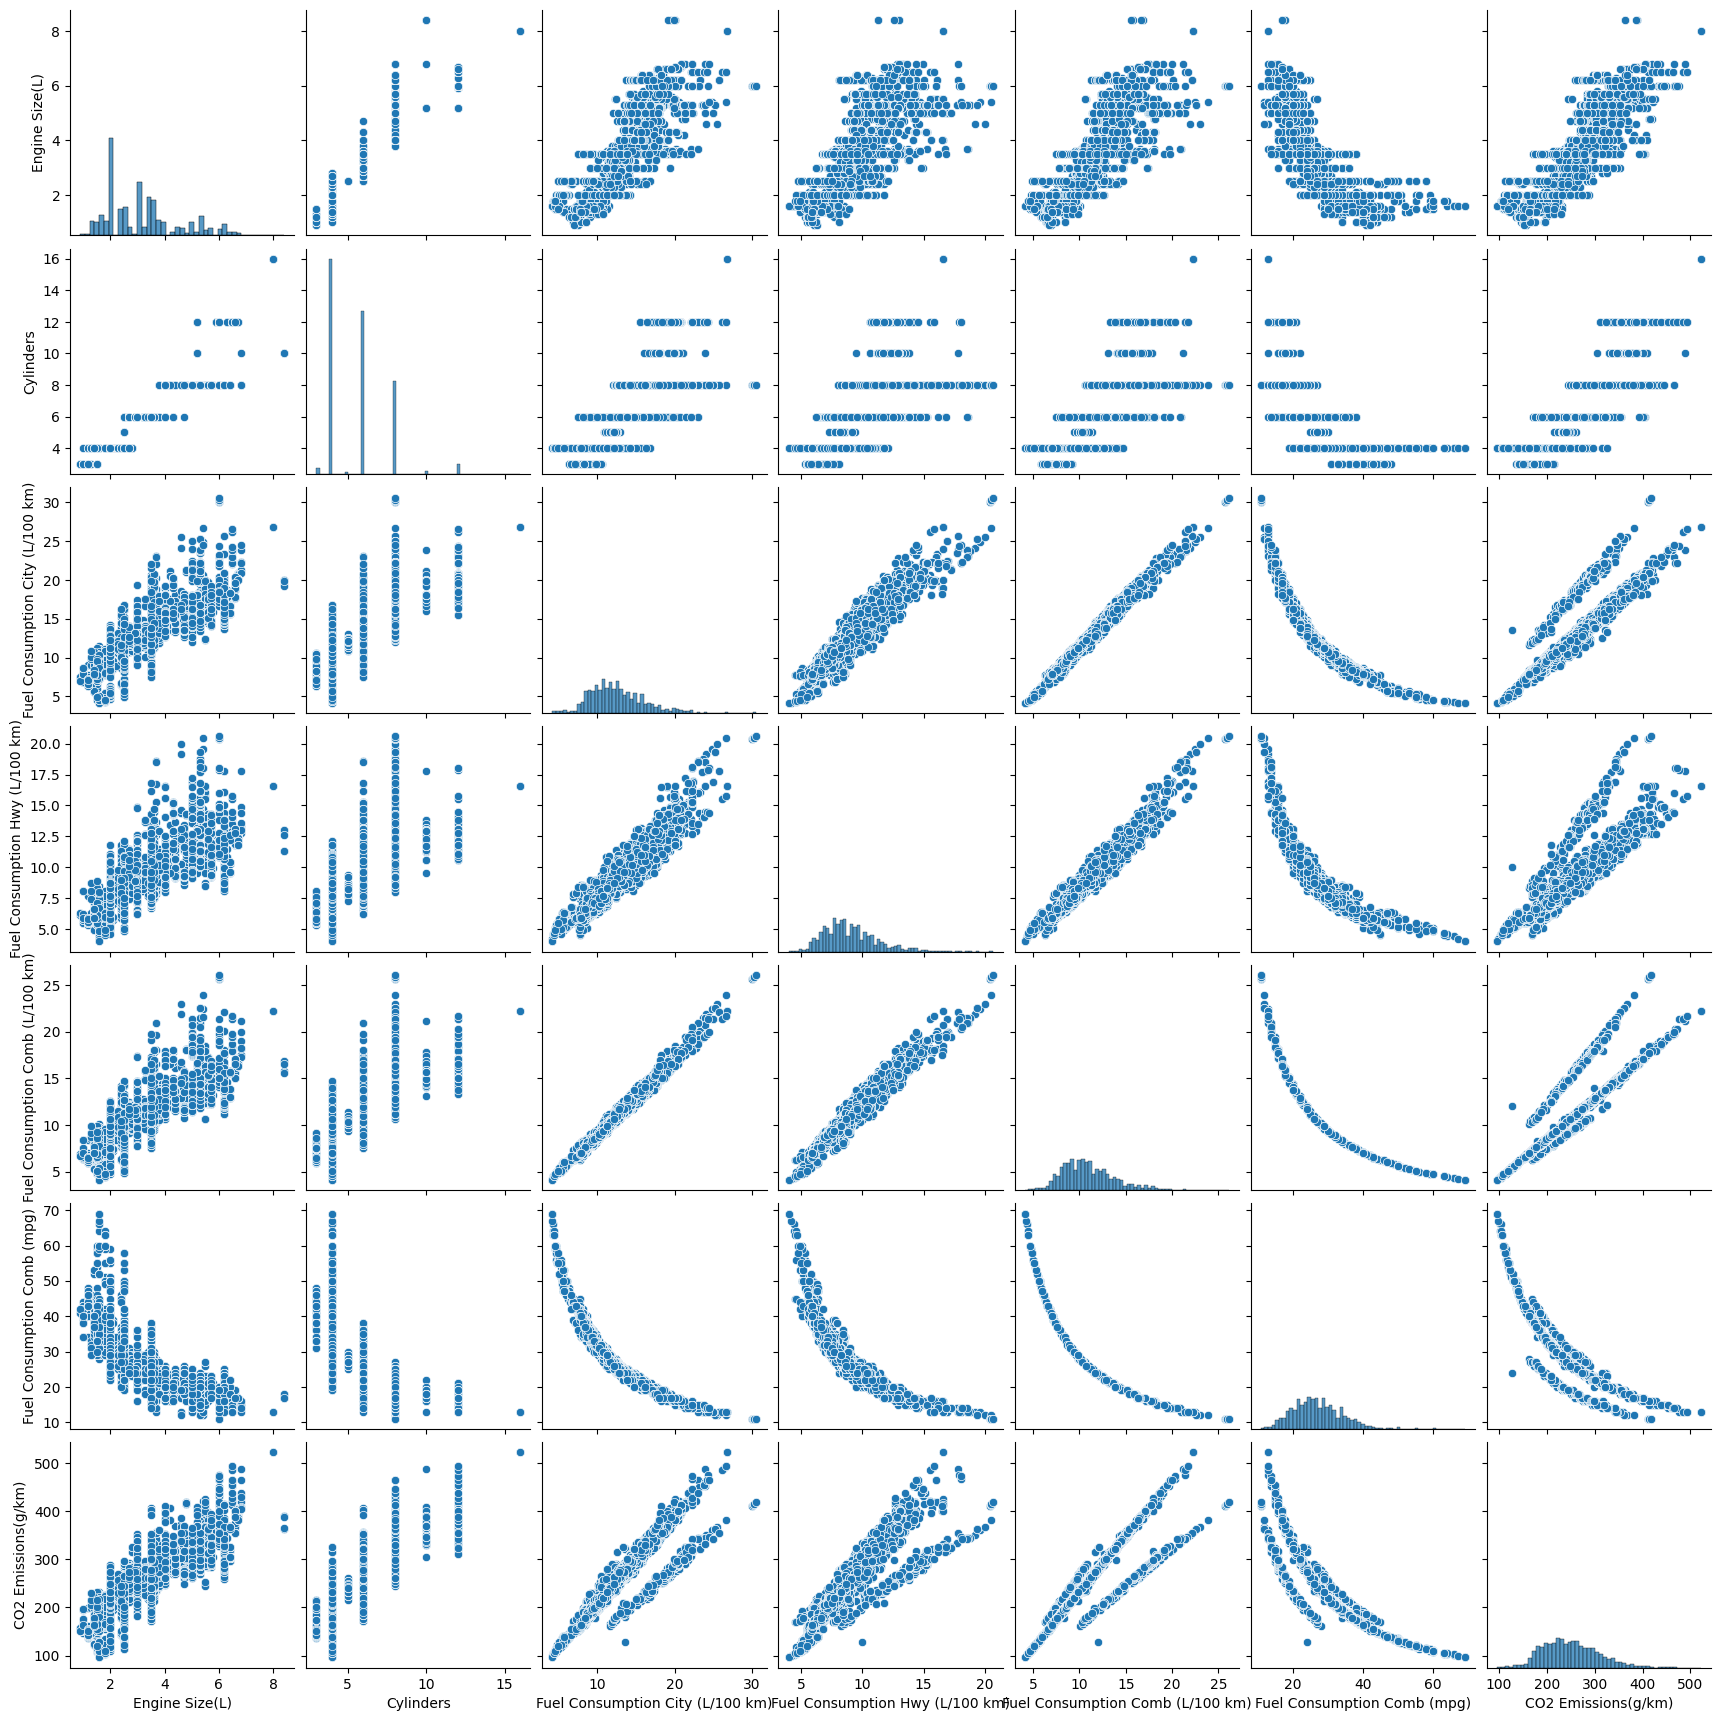

In [72]:
sns.pairplot(df);

# <font color='green'> <b>Simple Linear Regression Model</b><font color='black'>

## <font color='blue'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [73]:
slr = df[['Engine Size(L)','CO2 Emissions(g/km)' ]] # df is defined for SLR
slr.shape

(7385, 2)

In [74]:
X = slr['Engine Size(L)']
y = slr['CO2 Emissions(g/km)'] # Dependent(Target) and independent variables are defined

In [75]:
np.polyfit(X, y, deg=1)

array([ 36.77731519, 134.36589272])

In [76]:
slope, intercept = np.polyfit(X, y, deg=1)
print(slope, intercept)

36.77731518642009 134.36589272349337


In [78]:
y_pred = 37.123* X + 133.779  # coefficient obtained from the SLR model used for calculation of target variable
y_pred

0       208.0250
1       222.8742
2       189.4635
3       263.7095
4       263.7095
          ...   
7380    208.0250
7381    208.0250
7382    208.0250
7383    208.0250
7384    208.0250
Name: Engine Size(L), Length: 7385, dtype: float64

In [79]:
values = {"actual": y, "predicted": y_pred, "residual": y - y_pred, "LSE": (y - y_pred)**2}
slr_metrics = pd.DataFrame(values)
slr_metrics

actual  predicted  residual          LSE
0        196   208.0250  -12.0250   144.600625
1        221   222.8742   -1.8742     3.512626
2        136   189.4635  -53.4635  2858.345832
3        255   263.7095   -8.7095    75.855390
4        244   263.7095  -19.7095   388.464390
...      ...        ...       ...          ...
7380     219   208.0250   10.9750   120.450625
7381     232   208.0250   23.9750   574.800625
7382     240   208.0250   31.9750  1022.400625
7383     232   208.0250   23.9750   574.800625
7384     248   208.0250   39.9750  1598.000625

[7385 rows x 4 columns]

# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'>

In [81]:
# df determined for MLR
mlr = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'CO2 Emissions(g/km)']]

In [82]:
mlr.head()

Engine Size(L)  Fuel Consumption City (L/100 km)  \
0             2.0                               9.9   
1             2.4                              11.2   
2             1.5                               6.0   
3             3.5                              12.7   
4             3.5                              12.1   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   
4                              8.7                              10.6   

   CO2 Emissions(g/km)  
0                  196  
1                  221  
2                  136  
3                  255  
4                  244

## <font color='blue'> <b>Splitting the dataset into X(independent variables) and y (dependent variable)</b><font color='black'>

In [83]:
# Dependent(target) and independent variables assigned
X = mlr.drop(columns='CO2 Emissions(g/km)')
y = mlr['CO2 Emissions(g/km)']

## <font color='blue'> <b>Multicollinearity</b><font color='black'>

In [84]:
def color_correlation2(val):
    """
    Takes a scalar and returns a string with
    the css property in a variety of color scales 
    for different correlations.
    """
    if val >= 0.9 and val < 0.99999 or val <= -0.6 and val > -0.99999:
        color = 'red'
    elif val < 0.9 and val >= 0.3 or val > -0.6 and val <= -0.3:
        color = 'blue'
    elif val == 1:
        color = 'green'    
    else:
        color = 'black'
    return 'color: %s' % color
 
numeric_df.corr().style.applymap(color_correlation2)

## <font color='blue'> <b>Train | Test Split</b><font color='black'>

In [85]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [86]:
print("X Train features shape: {}\ny Train features shape: {}\nX Test features shape : {}\nY Test features shape : {}".format
      (X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X Train features shape: (5908, 4)
y Train features shape: (5908,)
X Test features shape : (1477, 4)
Y Test features shape : (1477,)


## <font color='blue'> <b>Training the Model</b><font color='black'>

In [87]:
# To obtain primitive scores, LR is made
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [88]:
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
lr.coef_

array([12.56845271,  5.05053931,  2.34421256,  6.07372739])

In [90]:
lr.intercept_

59.74619286854494

## <font color='blue'> <b>Predicting Test Data</b><font color='black'>

In [91]:
y_pred = lr.predict(X_test)
y_pred

array([189.33598162, 263.09825736, 356.2755592 , ..., 199.86465233,
       249.76663183, 251.20473183])

In [92]:
my_dict = {"actual": y_test, "prediction": y_pred, "residual":(y_test - y_pred)}

comparing = pd.DataFrame(my_dict)
comparing

actual  prediction   residual
1481     184  189.335982  -5.335982
4695     270  263.098257   6.901743
5399     384  356.275559  27.724441
4504     317  301.076191  15.923809
933      359  359.554921  -0.554921
...      ...         ...        ...
5545     229  232.798874  -3.798874
4689     226  223.135268   2.864732
4326     199  199.864652  -0.864652
5160     261  249.766632  11.233368
2770     252  251.204732   0.795268

[1477 rows x 3 columns]

In [93]:
result_sample = comparing.head(25)

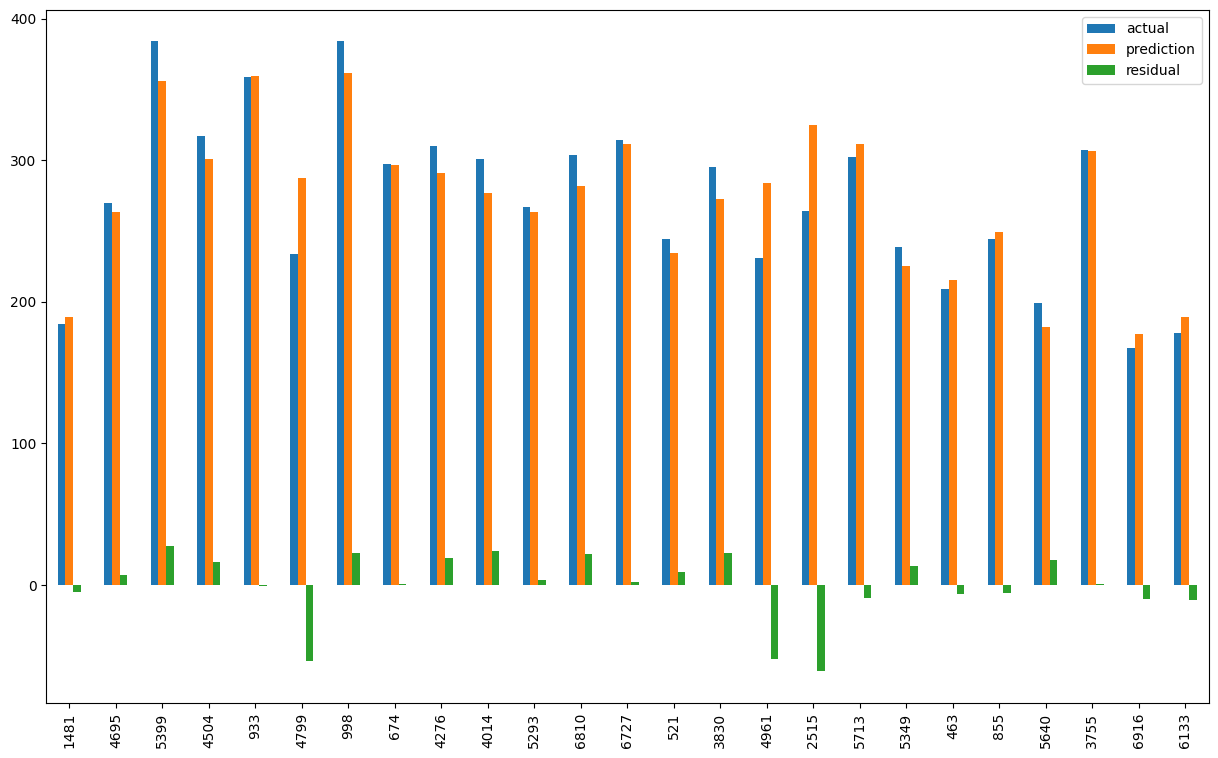

In [94]:
result_sample.plot(kind= "bar", figsize = (15,9))
plt.show()

## <font color='blue'> <b>Evaluating the Model</b><font color='black'>

In [95]:
# Evaluation of LR model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [96]:
#R2 Score measurement
R2_score = r2_score(y_test, y_pred)
R2_score

0.863022289850193

In [97]:
# MAE measurement
mae = mean_absolute_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mae

13.234732102024184

In [98]:
# MSE measurement
mse = mean_squared_error(y_test, y_pred)  # ne kadar dusuk o kadar basarili
mse

439.3166676698548

In [99]:
# root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # ne kadar dusuk okadar iyi, hatalari daha fazla cezalandirir, outlierlara karsi cok hassas.
rmse

20.95988233912239

In [101]:
# MAE error metric - The closest to "0' the better the model is.
mae / mlr['CO2 Emissions(g/km)'].mean()

0.05281540401295634

In [102]:
# RMSE error metric
rmse / mlr['CO2 Emissions(g/km)'].mean()   # outlier a daha hassas oldugu icin mae ye gore kayip var

0.08364390342555304

In [103]:
#Adjusted R2 score measurement
def adj_r2(y_test, y_pred, df_mlr):
    r2 = r2_score(y_test, y_pred)    #R2 score
    n = df_mlr.shape[0]      # number of observations gözlem
    p =df_mlr.shape[1]-1    # number of indep. variable = feature
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [104]:
adj_r2(y_test, y_pred, mlr)

0.8629480471888652

In [105]:
# Error metrics measurement and display
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance: ")
    print("---------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [106]:
eval_metric(y_test, y_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.863022289850193
MAE 		: 13.234732102024184
MSE 		: 439.3166676698548
RMSE 		: 20.95988233912239


In [107]:
# Overfitting kontrolü için train data daki R2 yi bulalım ve yukardak test R2 (0.86) ile karşılaştıralım
# X_train degerlerini prediction yapacağız
y_train_pred = lr.predict(X_train)

In [108]:
eval_metric(y_train, y_train_pred)

Model testing performance: 
---------------------------
R2_score 	: 0.876056377673065
MAE 		: 13.342593220487268
MSE 		: 430.9845121699895
RMSE 		: 20.760166477415094


In [109]:
residuals = y_test- y_pred

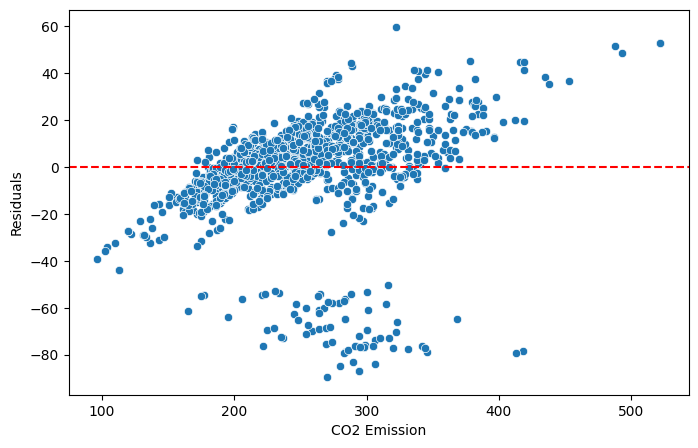

In [110]:
plt.figure(figsize=(8, 5))

sns.scatterplot(x=y_test, y=residuals)
plt.xlabel("CO2 Emission")
plt.ylabel("Residuals")
plt.axhline(y=0, color = "r", linestyle = "--")
plt.show()

In [111]:
from yellowbrick.regressor import ResidualsPlot, PredictionError

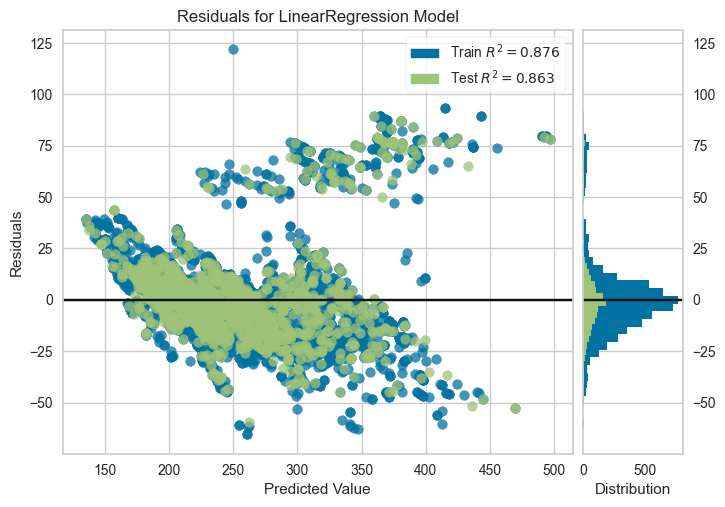

In [112]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() ;                # Finalize and render the figure

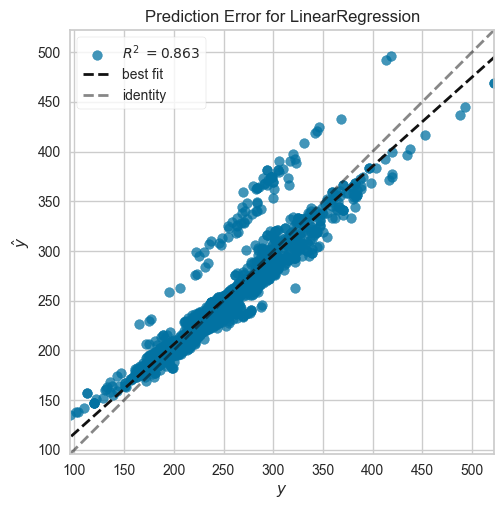

In [113]:
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

## <font color='blue'> <b>Polynomial Features</b><font color='black'>

In [114]:
from sklearn.preprocessing import PolynomialFeatures

## <font color='blue'> <b>Polynomial Model & Transformation</b><font color='black'>

In [115]:
poly_conv = PolynomialFeatures(degree=3, include_bias=False)

In [116]:
poly_features = poly_conv.fit_transform(X)
poly_features

array([[   2.   ,    9.9  ,    6.7  , ...,  381.565,  484.075,  614.125],
       [   2.4  ,   11.2  ,    7.7  , ...,  569.184,  709.632,  884.736],
       [   1.5  ,    6.   ,    5.8  , ...,  198.476,  201.898,  205.379],
       ...,
       [   2.   ,   11.7  ,    8.6  , ...,  761.788,  912.374, 1092.727],
       [   2.   ,   11.2  ,    8.3  , ...,  682.011,  813.483,  970.299],
       [   2.   ,   12.2  ,    8.7  , ...,  809.883,  996.063, 1225.043]])

## <font color='blue'> <b>Train Test Split</b><font color='black'>

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [118]:
from sklearn.linear_model import LinearRegression
model_poly = LinearRegression()
model_poly.fit(X_train, y_train)

LinearRegression()

## <font color='blue'> <b>Prediction</b><font color='black'>

In [119]:
y_pred = model_poly.predict(X_test)

In [120]:
my_dict = {"Actual":y_test, "pred":y_pred, "residual": y_test - y_pred }
compare = pd.DataFrame(my_dict)
compare.head(20)

Actual        pred   residual
1481     184  188.138901  -4.138901
4695     270  266.163433   3.836567
5399     384  361.617772  22.382228
4504     317  307.927235   9.072765
933      359  368.321950  -9.321950
4799     234  269.996387 -35.996387
998      384  366.910269  17.089731
674      297  299.560384  -2.560384
4276     310  317.895869  -7.895869
4014     301  292.414430   8.585570
5293     267  277.127548 -10.127548
6810     304  288.543900  15.456100
6727     314  312.148147   1.851853
521      244  248.036278  -4.036278
3830     295  283.255399  11.744601
4961     231  266.219789 -35.219789
2515     264  304.646146 -40.646146
5713     302  302.081531  -0.081531
5349     239  230.387195   8.612805
463      209  215.700546  -6.700546

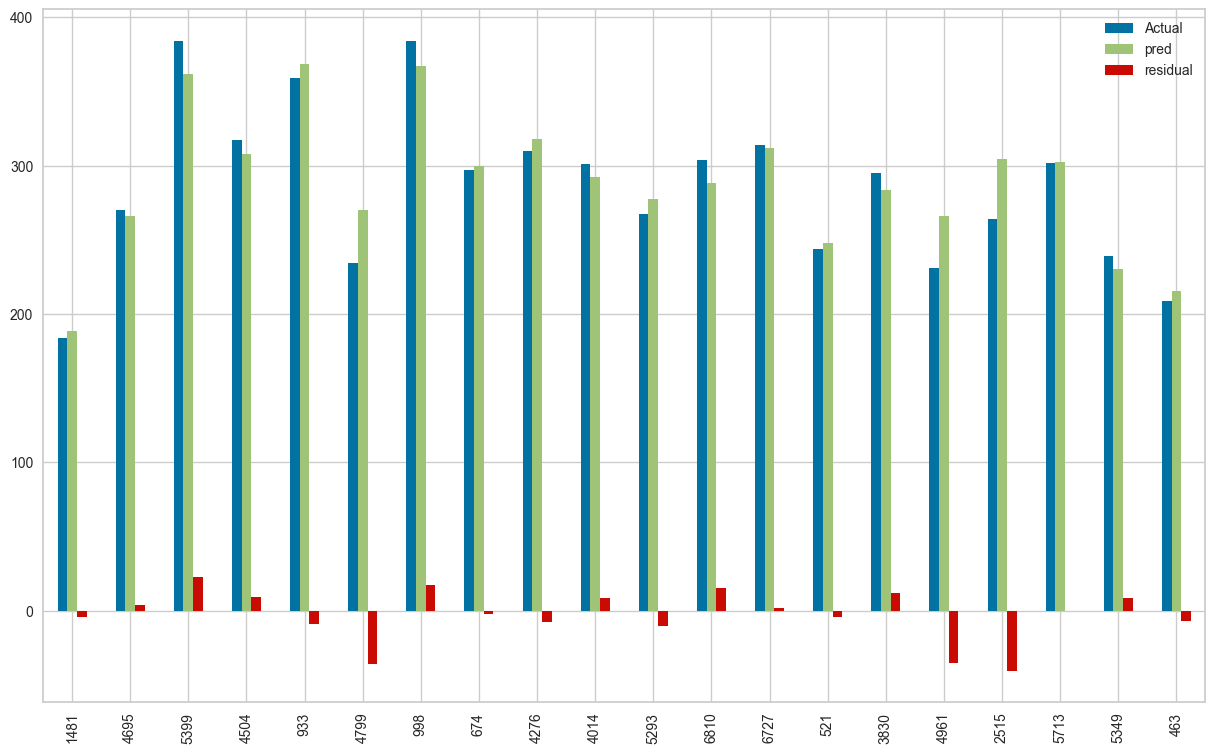

In [121]:
compare.head(20).plot(kind ="bar", figsize =(15,9))
plt.show();

In [122]:
model_poly.coef_

array([  -6.38377435,  151.25859727,  136.22266685, -223.82796193,
         -9.38521977,  -20.95435044,  -14.38405946,   41.62611418,
        -29.10344424,  -77.11053228,  109.18131124,  -55.86477939,
        161.59884647, -112.96941469,   -1.34410804,   -2.77270436,
         -5.64198763,    9.47924316,  -63.16016517, -101.23645499,
        231.98271944,  -45.0074856 ,  195.32453939, -218.18369848,
          3.61043411,   14.20543117,   -1.2831742 ,   13.95304614,
        -16.80096932,  -33.43140039,    2.8164358 ,   -3.54797379,
        -25.64939306,   46.25681988])

## <font color='blue'> <b>Model Evaluation</b><font color='black'>

In [123]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [124]:
y_pred = model_poly.predict(X_test) #X_test ile testimi yapıyorum

In [125]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [126]:
eval_metric(y_test, y_pred)  # Test kısmının degerleri

Model testing performance:
--------------------------
R2_score 	: 0.9248860292296366
MAE 		: 9.23687573127994
MSE 		: 240.90648980916274
RMSE 		: 15.521162643602532


In [127]:
y_train_pred = model_poly.predict(X_train)

In [128]:
poly = pd.DataFrame(eval_metric(y_train, y_train_pred))
poly

Model testing performance:
--------------------------
R2_score 	: 0.9288028965418222
MAE 		: 9.172772879512097
MSE 		: 247.57101919209185
RMSE 		: 15.734389698748783


Empty DataFrame
Columns: []
Index: []

## <font color='blue'> <b>The Best Power Definition & Selection</b><font color='black'>

In [129]:
def poly(d):   # degree derecesi içine ne yazarsam ona göre çözüm oluşturacak
    
    train_rmse_errors = []   # trains rmse değerlerin toplayacak
    test_rmse_errors = []    # test rmse değerlerin toplayacak
    number_of_features = []  # derece arttıkça feature sayısının kaça çıktığnı göreceğiz
    
    for i in range(1, d):  # 1 den kaçıncı dereceye kadar istiyorsak ona göre yazacağız
        polynomial_converter = PolynomialFeatures(degree = i, include_bias =False)
        poly_features = polynomial_converter.fit_transform(X)
        
        X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
        
        model = LinearRegression(fit_intercept=True) 
        model.fit(X_train, y_train)
        
        train_pred = model.predict(X_train)
        test_pred = model.predict(X_test)
        
        train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
        test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
        
        train_rmse_errors.append(train_RMSE)
        test_rmse_errors.append(test_RMSE)
        
        number_of_features.append(poly_features.shape[1])
        
    return pd.DataFrame({"train_rmse_errors": train_rmse_errors, "test_rmse_errors":test_rmse_errors, "number of features":number_of_features}, 
                        index=range(1,d))

In [130]:
poly(10)

train_rmse_errors  test_rmse_errors  number of features
1          20.855262         20.665769                   4
2          16.661711         16.560362                  14
3          15.820798         15.626022                  34
4          14.199758         14.116195                  69
5          13.517680         15.301884                 125
6          12.263261         33.769540                 209
7          11.062822        111.807792                 329
8          11.011577        101.363651                 494
9          16.011969        421.854813                 714

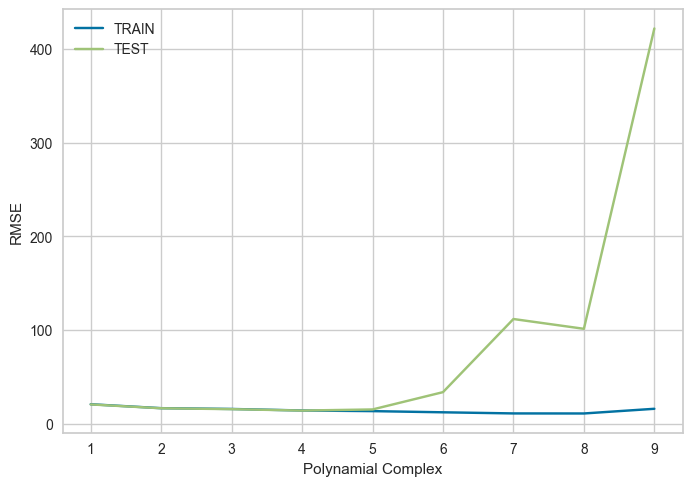

In [131]:
# yukardakş sonucların grafigini çizelim ve patlama noktasını görelim
plt.plot(range(1,10), poly(10)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,10), poly(10)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

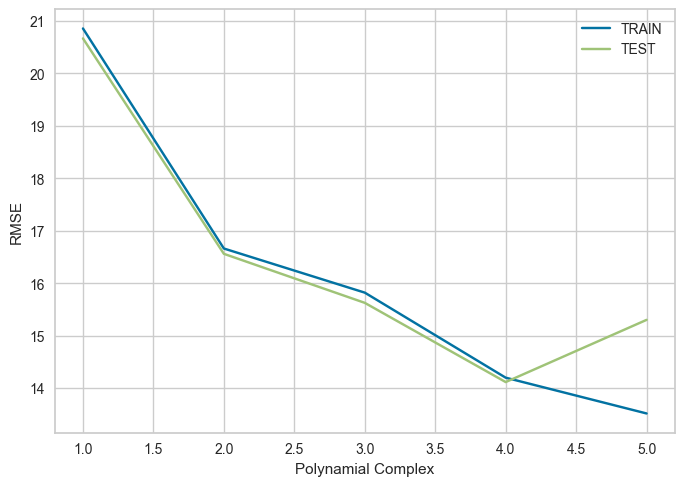

In [132]:
# grafige daha yaakından bakalım
plt.plot(range(1,6), poly(6)["train_rmse_errors"], label = "TRAIN")
plt.plot(range(1,6), poly(6)["test_rmse_errors"], label = "TEST")
plt.xlabel("Polynamial Complex")
plt.ylabel("RMSE")
plt.legend();
plt.show()

**Since the R2 score both train and test 0.92 and the RMSEs closest to 0, I choose 3th degree as best polynomial degree**

## <font color='blue'> <b>Scaling the Data</b><font color='black'>

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=19)

In [134]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [135]:
poly_features.shape

(7385, 34)

## <font color='blue'> <b>Standard Scaler</b><font color='black'>

In [136]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [137]:
X_train_scaled.shape

(5908, 34)

In [138]:
X_test_scaled= scaler.transform(X_test)
X_test_scaled

array([[-1.14360708, -1.03900345, -1.00421664, ..., -0.72700727,
        -0.73530356, -0.73967906],
       [ 0.25456947,  0.27307841,  0.02826553, ..., -0.12895097,
        -0.09513171, -0.06340709],
       [ 1.87351075,  1.67073083,  2.13812041, ...,  2.10032816,
         1.99482533,  1.87387219],
       ...,
       [-0.9964306 , -0.8108153 , -0.82465452, ..., -0.65438552,
        -0.66447656, -0.67122234],
       [-0.11337173, -0.04068029,  0.20782765, ..., -0.07816093,
        -0.12261258, -0.16613005],
       [ 0.25456947, -0.09772733, -0.06151553, ..., -0.23653631,
        -0.24887961, -0.26171004]])

**Check if there is data leakage**

In [139]:
pd.DataFrame(X_train_scaled).agg(['mean', 'std']).round()

0    1    2    3    4    5    6    7    8    9   ...   24   25   26  \
mean  0.0  0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  0.0 -0.0  ...  0.0  0.0 -0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       27   28   29   30   31   32   33  
mean -0.0  0.0 -0.0  0.0 -0.0 -0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 34 columns]

In [140]:
pd.DataFrame(X_test_scaled).agg(['mean', 'std']).round()

0    1    2    3    4    5    6    7    8    9   ...   24   25   26  \
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0  1.0  1.0   

       27   28   29   30   31   32   33  
mean  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
std   1.0  1.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 34 columns]

In [195]:
print(models)

                               Adjusted R-Squared         R-Squared  \
Model                                                                 
ExtraTreesRegressor                          0.99              0.99   
XGBRegressor                                 0.99              0.99   
RandomForestRegressor                        0.99              0.99   
DecisionTreeRegressor                        0.99              0.99   
ExtraTreeRegressor                           0.99              0.99   
BaggingRegressor                             0.99              0.99   
HistGradientBoostingRegressor                0.98              0.99   
LGBMRegressor                                0.98              0.98   
KNeighborsRegressor                          0.98              0.98   
GradientBoostingRegressor                    0.97              0.98   
MLPRegressor                                 0.93              0.93   
LassoLarsCV                                  0.92              0.93   
LassoL

## <font color='blue'> <b>Linear Regression With Scaled Data</b><font color='black'>

In [143]:
from sklearn.linear_model import LinearRegression

In [144]:
lm = LinearRegression()

In [145]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [146]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    return pd.DataFrame(scores)

In [148]:
ls = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
ls

linear_train  linear_test
R2            0.93         0.92
mae           9.17         9.24
mse         247.57       240.91
rmse         15.73        15.52

## <font color='blue'> <b>Cross Validation</b><font color='black'>

In [149]:
from sklearn.model_selection import cross_validate, cross_val_score

In [150]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring =['r2',
                                                                  'neg_mean_absolute_error',
                                                                  'neg_mean_squared_error',
                                                                  'neg_root_mean_squared_error'], cv = 5)

In [151]:
pd.DataFrame(scores, index = range(1,6))

fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
1      0.01        0.01     0.93                         -9.47   
2      0.02        0.00     0.94                         -8.81   
3      0.01        0.00     0.92                         -9.28   
4      0.01        0.00     0.92                         -9.49   
5      0.01        0.00     0.92                         -9.45   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
1                      -259.17                            -16.10  
2                      -224.75                            -14.99  
3                      -252.36                            -15.89  
4                      -273.90                            -16.55  
5                      -280.57                            -16.75

## <font color='blue'> <b>RidgeCV</b><font color='black'>

In [152]:
from sklearn.linear_model import RidgeCV

In [153]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [154]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [155]:
ridge_cv_model.alpha_

0.01

In [156]:
ridge_cv_model = RidgeCV(alphas = np.linspace(0.0001, 0.06, 100), cv=5, scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.0001    , 0.00070505, 0.0013101 , 0.00191515, 0.0025202 ,
       0.00312525, 0.0037303 , 0.00433535, 0.0049404 , 0.00554545,
       0.00615051, 0.00675556, 0.00736061, 0.00796566, 0.00857071,
       0.00917576, 0.00978081, 0.01038586, 0.01099091, 0.01159596,
       0.01220101, 0.01280606, 0.01341111, 0.01401616, 0.01462121,
       0.01522626, 0.01583131, 0.01643636, 0.01704141, 0.01764646,
       0.0182...
       0.04245354, 0.04305859, 0.04366364, 0.04426869, 0.04487374,
       0.04547879, 0.04608384, 0.04668889, 0.04729394, 0.04789899,
       0.04850404, 0.04910909, 0.04971414, 0.05031919, 0.05092424,
       0.05152929, 0.05213434, 0.05273939, 0.05334444, 0.05394949,
       0.05455455, 0.0551596 , 0.05576465, 0.0563697 , 0.05697475,
       0.0575798 , 0.05818485, 0.0587899 , 0.05939495, 0.06      ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [157]:
ridge_cv_model.alpha_

0.0001

In [158]:
ridge_cv_model = RidgeCV(alphas = alpha_space, cv=5, scoring='neg_root_mean_squared_error')
ridge_cv_model.fit(X_train_scaled, y_train)

-15.98259013696088

In [159]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [160]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, 'Ridge_CV')
rcs

Ridge_CV_train  Ridge_CV_test
R2              0.93           0.93
mae             9.17           9.21
mse           248.46         240.07
rmse           15.76          15.49

In [161]:
ridge_cv_model.coef_

array([   -8.96644453,   373.20533376,   222.62785646,  -413.88501938,
         -99.58293524,  -445.78551337,  -203.50936266,   798.65499399,
         -79.76507514,   -11.64218902, -1212.66851765,  -576.90244679,
         343.56179836,  1264.34425205,   -85.12464943,   286.33002509,
        -269.27286743,   279.61049643,  -420.34535973,  1679.74534717,
        -558.73808513,  -177.38671122,  -335.90610835,  -460.75468996,
        1077.56485368,  -547.66843644,  -317.21742784,  1326.96180658,
       -1378.67967043,  -272.24871477,   465.49561339,  -451.50360345,
        -998.55658076,  1264.52653242])

## <font color='blue'> <b>LassoCV</b><font color='black'>

In [162]:
from sklearn.linear_model import Lasso, LassoCV

In [163]:
lasso_cv_model = LassoCV(alphas=alpha_space, cv=5, max_iter=10000, random_state=19)

In [164]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=10000, random_state=19)

In [165]:
lasso_cv_model.alpha_

0.01

In [166]:
best_alpha = lasso_cv_model.alpha_

In [167]:

lasso_cv_model = LassoCV(alphas=np.linspace(0.0001, 0.02, 100), cv=5, max_iter=10000, random_state=19)

In [168]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.0001    , 0.00030101, 0.00050202, 0.00070303, 0.00090404,
       0.00110505, 0.00130606, 0.00150707, 0.00170808, 0.00190909,
       0.0021101 , 0.00231111, 0.00251212, 0.00271313, 0.00291414,
       0.00311515, 0.00331616, 0.00351717, 0.00371818, 0.00391919,
       0.0041202 , 0.00432121, 0.00452222, 0.00472323, 0.00492424,
       0.00512525, 0.00532626, 0.00552727, 0.00572828, 0.00592929,
       0.00...
       0.01417071, 0.01437172, 0.01457273, 0.01477374, 0.01497475,
       0.01517576, 0.01537677, 0.01557778, 0.01577879, 0.0159798 ,
       0.01618081, 0.01638182, 0.01658283, 0.01678384, 0.01698485,
       0.01718586, 0.01738687, 0.01758788, 0.01778889, 0.0179899 ,
       0.01819091, 0.01839192, 0.01859293, 0.01879394, 0.01899495,
       0.01919596, 0.01939697, 0.01959798, 0.01979899, 0.02      ]),
        cv=5, max_iter=10000, random_state=19)

In [169]:
lasso_cv_model.alpha_

0.0001

In [170]:
y_pred = lasso_cv_model.predict(X_test_scaled)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [171]:
lcs = train_val(y_train, y_train_pred, y_test,y_pred, 'lasso_cv')
lcs

lasso_cv_train  lasso_cv_test
R2              0.93           0.92
mae             9.08           9.14
mse           257.33         249.27
rmse           16.04          15.79

In [172]:
lasso_cv_model.coef_

array([   5.0809995 ,  123.20734368,   15.09531151,   31.76868928,
        -37.0957457 ,   11.89338542,  -11.47044178,   14.97236368,
       -200.23097835,  -38.07837069,   32.48215313,   41.83610964,
        -34.86842871,    7.59685256,  -44.38149885,   86.52383862,
         42.23802996,  -25.64839056,   12.59270017,  -27.73167757,
         16.44827727,   46.98162735,  -40.09112631,   -3.91008012,
        104.34146813, -121.47952544,   75.98934971,  -47.24520293,
        -19.25230049,   41.17779726,  139.64512626, -100.93580485,
        -49.31747947,    8.36443414])

## <font color='blue'> <b>ElasticNetCV</b><font color='black'>

In [173]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [174]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space,
                                l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1],
                                cv = 5, max_iter = 100000, random_state = 42)

In [175]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [176]:
elastic_cv_model.alpha_

0.01

In [177]:
elastic_cv_model.l1_ratio_

1.0

In [178]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [179]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

elastic_cv_train  elastic_cv_test
R2                0.92             0.92
mae               8.90             8.93
mse             261.35           253.48
rmse             16.17            15.92

In [180]:
elastic_cv_model.coef_

array([   0.        ,   96.28516287,   45.52636871,   27.70875925,
        -42.16805973,    0.        ,   32.011965  ,    0.        ,
        -70.9586068 , -121.3032602 ,   -0.40703163,    0.        ,
         -0.        ,   -0.        ,   -2.59894547,    0.        ,
          3.14495376,    0.        ,   84.29474672,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
         55.71801236,  -76.23409357,    0.        ,   -4.95458475,
        -18.09000075,   -0.        ,   46.33220763,   -0.        ,
         -0.        ,   -0.        ])

## <font color='blue'> <b>GridSearchCV</b><font color='black'>

In [181]:
from sklearn.model_selection import GridSearchCV

In [182]:
elastic_model = ElasticNet(max_iter = 10000, random_state = 42)

In [183]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
             "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [184]:
grid_model = GridSearchCV(estimator= elastic_model,
                          param_grid = param_grid,
                          scoring = "neg_root_mean_squared_error",
                          cv = 10, verbose = 2) # verbose alttaki raporu verdi

In [185]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits


[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.6s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.8s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.5s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.7s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   3.2s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.4s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   3.3s
[CV] END ...................

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [186]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 1}

In [187]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [188]:
gcs = train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")
gcs

GridSearch_train  GridSearch_test
R2                0.92             0.92
mae               8.94             8.96
mse             260.98           252.75
rmse             16.15            15.90

In [189]:
pd.concat([ls, rcs,lcs,ecs,gcs], axis = 1)

linear_train  linear_test  Ridge_CV_train  Ridge_CV_test  \
R2            0.93         0.92            0.93           0.93   
mae           9.17         9.24            9.17           9.21   
mse         247.57       240.91          248.46         240.07   
rmse         15.73        15.52           15.76          15.49   

      lasso_cv_train  lasso_cv_test  elastic_cv_train  elastic_cv_test  \
R2              0.93           0.92              0.92             0.92   
mae             9.08           9.14              8.90             8.93   
mse           257.33         249.27            261.35           253.48   
rmse           16.04          15.79             16.17            15.92   

      GridSearch_train  GridSearch_test  
R2                0.92             0.92  
mae               8.94             8.96  
mse             260.98           252.75  
rmse             16.15            15.90

# <font color='green'> <b>Final Model and Prediction</b><font color='black'>

In [190]:
final_scaler = StandardScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [191]:
final_model = ElasticNet(alpha=0.01, l1_ratio=1.0)

In [192]:
final_model.fit(X_scaled, y)

ElasticNet(alpha=0.01, l1_ratio=1.0)

In [193]:
final_model.coef_

array([  38.75103316,   76.62765367,   19.36586111,    5.93374592,
       -106.3890685 ,    3.29281296,    9.91173023,    0.29756602,
        -67.27234182,   -6.75560859,   -0.        ,   15.50049147,
         -0.        ,   -1.54866062,    2.95324767,   74.01142529,
          3.99836305,    0.        ,   29.86002386,   -3.01026302,
          0.        ,   -0.        ,   -0.        ,   -0.        ,
          0.738538  ,  -43.36097366,    8.59113475,  -15.85593205,
         -0.        ,    5.15131238,   10.60844153,   -4.40312458,
         -5.05744095,   -0.        ])

In [194]:
final_model.intercept_

250.5846987136092